In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phones-2024/processed_data.csv
/kaggle/input/phones-2024/data.json


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import requests 
import re
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from prettytable import PrettyTable
from pandas import json_normalize

In [4]:
df = pd.read_json("/kaggle/input/phones-2024/data.json")

In [5]:
df.head()

,phone_brand,phone_model,price,specs,pricing
0,itel,itel Smart Watch 1,None,"{'Network': {'2G bands': ' N/A', '3G bands': '...",NaN
1,oukitel,Oukitel WP19,About 380 EUR,{'Network': {'2G bands': 'GSM 850 / 900 / 1800...,NaN
2,cubot,Cubot Smart Watch,None,"{'Network': {'2G bands': ' N/A', '3G bands': '...",NaN
3,cubot,Cubot ID206,None,"{'Network': {'2G bands': ' N/A', '3G bands': '...",NaN
4,tcl,TCL Plex,About 330 EUR,{'Network': {'2G bands': 'GSM 850 / 900 / 1800...,NaN


In [6]:
df = pd.read_json('/kaggle/input/phones-2024/data.json')
specs_normalized = json_normalize(df['specs'])
df = df.drop(columns=['specs']).join(specs_normalized)
print(f"Shape of The Anime Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Anime Dataset : (8792, 85)

Glimpse of The Dataset :


,phone_brand,phone_model,price,pricing,Network.2G bands,Network.3G bands,Network.4G bands,Network.Speed,Network.GPRS,Network.EDGE,Launch.Announced,Launch.Status,Body.Dimensions,Body.Weight,Body.Build,Body.SIM,Display.Type,Display.Size,Display.Resolution,Platform.OS,Memory.Card slot,Memory.Internal,Sound.Loudspeaker,Sound.3.5mm jack,Comms.WLAN,Comms.Bluetooth,Comms.Positioning,Comms.NFC,Comms.Radio,Comms.USB,Features.Sensors,Battery.Type,Misc.Colors,Platform.Chipset,Platform.CPU,Platform.GPU,Main Camera.Triple,Main Camera.Features,Main Camera.Video,Selfie camera.Single,Selfie camera.Video,Battery.Charging,Misc.Price,Display.Protection,Battery.Stand-by,Battery.Talk time,Misc.Models,Tests.Loudspeaker,Tests.Performance,Tests.Display,Tests.Battery (old),Main Camera.Single,Main Camera.Dual,Main Camera.Quad,Network.5G bands,Network.Technology,Selfie Camera.Single,Selfie Camera.Video,Comms.Infrared port,Selfie camera.Features,Main Camera.Penta,Selfie camera.Dual,Tests.Camera,Misc.SAR,Selfie Camera.Features,Features.Languages,Body.Keyboard,Memory.Phonebook,Memory.Call records,Features.Messaging,Features.Browser,Features.Games,Features.Java,Misc.SAR EU,Tests.Audio quality,Tests.Battery (new),Battery.Music play,Sound.Alert types,Features.Clock,Features.Alarm,Selfie camera.No,Selfie camera.Triple,Main Camera.Dual or Triple,Main Camera.Five,Selfie Camera.Dual
0,itel,itel Smart Watch 1,None,nan,N/A,N/A,N/A,No,No,No,2022,Available. Released 2022,-,-,"Plastic back, plastic frame",No,IPS LCD,1.72 inches,240 x 283 pixels (~216 ppi density),Proprietary OS,No,Unspecified storage,Yes,No,No,"5.0, A2DP, LE",No,No,No,No,"Accelerometer, heart rate, SpO2","200 mAh, non-removable",Black,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,oukitel,Oukitel WP19,About 380 EUR,nan,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100,LTE,"HSPA, LTE",nan,nan,"2022, June","Available. Released 2022, July",-,-,nan,"Dual SIM (Nano-SIM, dual stand-by)","IPS LCD, 90Hz","6.78 inches, 109.2 cm",1080 x 2460 pixels (~396 ppi density),Android 12,microSDXC (dedicated slot),256GB 8GB RAM,Yes,Unspecified,Yes,Yes,"GPS, GLONASS, GALILEO, BDS",Yes,Unspecified,"USB Type-C 2.0, OTG",Unspecified,"Li-Po 21000 mAh, non-removable","Blue, Camo, Camouflage",Mediatek MT6785V/CD Helio G95 (12 nm),Octa-core (2x2.05 GHz Cortex-A76 & 6x2.0 GHz Cortex-A55),Mali-G76 MC4,"64 MP, f/1.8, (wide), PDAF","LED flash, panorama","4K@30fps, 1080p@30fps",16 MP,Yes,33W wired,About 380 EUR,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,cubot,Cubot Smart Watch,None,nan,N/A,N/A,N/A,No,No,No,2020,Available. Released 2020,41.6 x 41.6 x 11.6 mm (1.64 x 1.64 x 0.46 in),-,nan,No,TFT LCD,1.3 inches,240 x 240 pixels (~261 ppi density),Proprietary OS,No,nan,No,No,No,"5.0, A2DP, LE",No,No,No,No,"Accelerometer, gyro, heart rate","210 mAh, non-removable","Black, Pink",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Scratch-resistant glass,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,cubot,Cubot ID206,None,nan,N/A,N/A,N/A,No,No,No,2020,Available. Released 2020,40 x 40 x 12 mm (1.57 x 1.57 x 0.47 in),-,nan,No,TFT LCD,1.7 inches,240 x 280 pixels (~217 ppi density),Proprietary OS,No,nan,No,No,No,"5.0, A2DP, LE",No,No,No,No,"Accelerometer, gyro, heart rate, SpO2","300 mAh, non-removable","Black, Pink",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Scratch-resistant glass,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,tcl,TCL Plex,About 330 EUR,nan,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (D

In [7]:
df.isnull().sum()

phone_brand                      0
phone_model                     70
price                         1608
pricing                       7997
Network.2G bands                10
                              ... 
Selfie camera.No              8791
Selfie camera.Triple          8784
Main Camera.Dual or Triple    8790
Main Camera.Five              8789
Selfie Camera.Dual            8790
Length: 85, dtype: int64

In [8]:
print(f"Informations About Dataset: \n")
print(df.info())

Informations About Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8792 entries, 0 to 8791
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   phone_brand                 8792 non-null   object
 1   phone_model                 8722 non-null   object
 2   price                       7184 non-null   object
 3   pricing                     795 non-null    object
 4   Network.2G bands            8782 non-null   object
 5   Network.3G bands            6956 non-null   object
 6   Network.4G bands            5161 non-null   object
 7   Network.Speed               6893 non-null   object
 8   Network.GPRS                2160 non-null   object
 9   Network.EDGE                2156 non-null   object
 10  Launch.Announced            8775 non-null   object
 11  Launch.Status               8782 non-null   object
 12  Body.Dimensions             8768 non-null   object
 13  Body.Weight       

In [9]:
df['europe_pricing'] = df['pricing'].apply(lambda x: x.get('Europe', {}) if isinstance(x, dict) else {})
df['USA_pricing'] = df['pricing'].apply(lambda x: x.get('United States', {}) if isinstance(x, dict) else {})
df['UK_pricing'] = df['pricing'].apply(lambda x: x.get('United Kingdom', {}) if isinstance(x, dict) else {})
df['International_pricing'] = df['pricing'].apply(lambda x: x.get('International', {}) if isinstance(x, dict) else {})
df['Canada_pricing'] = df['pricing'].apply(lambda x: x.get('Canada', {}) if isinstance(x, dict) else {})
df['Australia_pricing'] = df['pricing'].apply(lambda x: x.get('Australia', {}) if isinstance(x, dict) else {})
df = df.sort_values(by='phone_brand').reset_index(drop=True)

In [10]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    europe_pricing = row['europe_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in europe_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'EUR',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_Amazon_DE = pd.DataFrame(new_rows)
df_Amazon_DE.price = df_Amazon_DE.price.str.replace('€', '')
df_Amazon_DE.price = df_Amazon_DE.price.str.replace(',', '')
df_Amazon_DE.price = df_Amazon_DE.price.astype(float)

In [11]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    USA_pricing = row['USA_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in USA_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'USD',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_USA = pd.DataFrame(new_rows)
df_USA.price = df_USA.price.str.replace('$', '')
df_USA.price = df_USA.price.str.replace(',', '')
df_USA.price = df_USA.price.astype(float)

In [12]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    UK_pricing = row['UK_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in UK_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'GBP',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_UK = pd.DataFrame(new_rows)
df_UK.price = df_UK.price.str.replace('£', '')
df_UK.price = df_UK.price.str.replace(',', '')
df_UK.price = df_UK.price.astype(float)

In [13]:
new_rows = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    phone_brand = row['phone_brand']
    phone_model = row['phone_model']
    International_pricing = row['International_pricing']
    Launch = row['Launch.Status']
    Dimensions = row['Body.Dimensions']
    Weight = row['Body.Weight']
    Display_Type = row['Display.Type']
    Display_Size = row['Display.Size']
    Display_Resolution = row['Display.Resolution']
    OS = row['Platform.OS']
    NFC = row['Comms.NFC']
    USB = row['Comms.USB']
    BATTERY = row['Battery.Type']
    Features_Sensors = row['Features.Sensors']
    Colors = row['Misc.Colors']
    Video = row['Main Camera.Video']
    Chipset = row['Platform.Chipset']
    CPU = row['Platform.CPU']
    GPU = row['Platform.GPU']
    
    
    # Iterate over the nested values in the europe_pricing column
    for store, pricing in International_pricing.items():
        for storage_config, price in pricing.items():
            # Create a new row with the same values for all other columns
            new_row = {
                'phone_brand': phone_brand,
                'phone_model': phone_model,
                'store': store,
                'storage_config': storage_config,
                'price': price,
                'currency': 'USD',
                'Launch': Launch,
                'Dimensions': Dimensions,
                'Weight': Weight,
                'Display_Type': Display_Type,
                'Display_Size': Display_Size,
                'Display_Resolution': Display_Resolution,
                'OS': OS,
                'NFC': NFC,
                'USB': USB,
                'BATTERY': BATTERY,
                'Features_Sensors': Features_Sensors,
                'Colors': Colors,
                'Video': Video,
                'Chipset': Chipset,
                'CPU': CPU,
                'GPU': GPU
                
            }
            # Append the new row to the list
            new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
df_International = pd.DataFrame(new_rows)
df_International.price = df_International.price.str.replace('$', '')
df_International.price = df_International.price.str.replace(',', '')
df_International.price = df_International.price.astype(float)

In [14]:
# Am using a free API to get the exchange rate for EUR to USD and GBP to USD
url = 'https://v6.exchangerate-api.com/v6/0912ef8618fa1816929509b8/pair/EUR/USD'
response = requests.get(url)
data = response.json()
EUR_USD = data['conversion_rate']
url = 'https://v6.exchangerate-api.com/v6/0912ef8618fa1816929509b8/pair/GBP/USD'
response = requests.get(url)
data = response.json()
GBP_USD = data['conversion_rate']
print(EUR_USD, GBP_USD)

1.0864 1.3048


In [15]:
df_all = pd.concat([df_Amazon_DE, df_USA, df_UK, df_International], ignore_index=True)
df_all['price_USD'] = df_all.apply(lambda x: x['price'] * EUR_USD if x['currency'] == 'EUR' else x['price'], axis=1)
df_all['price_USD'] = df_all.apply(lambda x: x['price_USD'] * GBP_USD if x['currency'] == 'GBP' else x['price_USD'], axis=1)
df_all['price_USD'] = df_all['price_USD'].round(2)
df_all[['storage', 'ram']] = df_all['storage_config'].str.split(' ', n=1, expand=True)
df_all['ram'] = df_all['ram'].str.replace(' RAM', '')
df_all['storage'] = df_all['storage'].str.replace('GB', '')
df_all['storage'] = df_all['storage'].str.replace('TB', '000')
df_all['storage'] = df_all['storage'].astype(int)
df_all['ram'] = df_all['ram'].str.replace('GB', '')
df_all.fillna(8, inplace=True)
df_all['ram'] = df_all['ram'].astype(int)
df_all.drop(columns=['storage_config'], inplace=True)
desired_order = ['phone_brand', 'phone_model', 'store', 'price','currency','price_USD', 'storage', 'ram']
remaining_columns = [col for col in df_all.columns if col not in desired_order]
new_order = desired_order + remaining_columns
df_all = df_all[new_order]
df_all['Launch'] = df_all['Launch'].str.replace('Available. Released ','')
df_all['Launch'] = df_all['Launch'].str.replace(',','')

In [16]:
def parse_dates(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y %B %d')
    except ValueError:
        return pd.to_datetime(date_str, format='%Y %B', errors='coerce')

df_all['Launch'] = df_all['Launch'].apply(parse_dates)
df_all['Launch'] = df_all['Launch'].fillna(df_all['Launch'].apply(lambda x: pd.to_datetime(f"{x.year}-{x.month}-01")))
df_all['Year'] = df_all['Launch'].dt.year

In [17]:
df_all['Foldable'] = df_all['Dimensions'].str.contains('Unfolded').map({True: 'Yes', False: 'No'})
df_all['Foldable'] = df_all['Foldable'].fillna('No')
df_all['Foldable'] = df_all['Foldable'].map({'Yes': 1, 'No': 0})

In [18]:
df_all['Weight'] = df_all['Weight'].str.extract(r'(\d+\.?\d*\s*g)')
df_all['Weight'] = df_all['Weight'].str.replace(' g', '')
df_all['Weight'] = df_all['Weight'].astype(float)

In [19]:
df_all['Display_Size'] = df_all['Display_Size'].str.extract(r'(\d+\.?\d*\s*inch)')
df_all['Display_Size'] = df_all['Display_Size'].str.replace(' inch', '')
df_all['Display_Size'] = df_all['Display_Size'].astype(float)

In [20]:
def extract_ppi_density(resolution_str):
    if not isinstance(resolution_str, str):
        return None
    try:
        # Use regular expression to find the PPI value
        ppi_match = re.search(r'~(\d+)\s*ppi', resolution_str)
        ppi = int(ppi_match.group(1)) if ppi_match else None
        return ppi
    except Exception as e:
        print(f"Error extracting PPI density: {e}")
        return None

df_all['PPI_Density'] = df_all['Display_Resolution'].apply(extract_ppi_density)
df_all['PPI_Density'] = pd.to_numeric(df_all['PPI_Density'], errors='coerce')

In [21]:
df_all['Display_Resolution'] = df_all['Display_Resolution'].str.extract(r'(\d+\s*x\s*\d+)')

In [22]:
def clean_nfc_value(nfc_str):
    if not isinstance(nfc_str, str):
        return None
    try:
        
        if 'Yes' in nfc_str:
            return 'Yes'
        elif 'No' in nfc_str:
            return 'No'
        else:
            return None
    except Exception as e:
        print(f"Error cleaning NFC value: {e}")
        return None
df_all['NFC'] = df_all['NFC'].apply(clean_nfc_value)
df_all['NFC'] = df_all['NFC'].fillna('No')
df_all['NFC'] = df_all['NFC'].map({'Yes': 1, 'No': 0})

In [23]:
df_all['BATTERY'] = df_all['BATTERY'].str.extract(r'(\d+\s*mAh)')
df_all['BATTERY'] = df_all['BATTERY'].str.replace(' mAh', '')
df_all['BATTERY'] = df_all['BATTERY'].astype(int)

In [24]:
def q1(x):
    return x.quantile(0.10)

def q2(x):
    return x.quantile(0.50)

def q3(x):
    return x.quantile(0.90)

price_quantiles = df_all.groupby('Year').agg(
        quantile_10=('price_USD', q1), 
        quantile_50=('price_USD', q2),
        quantile_90=('price_USD', q3)
                                    ).reset_index()

In [25]:
df_all = df_all.merge(price_quantiles, on='Year')
df_all['price_range'] = 'medium price'
df_all.loc[df_all['quantile_10'] > df_all['price_USD'], 'price_range'] = 'low price'
df_all.loc[df_all['quantile_90'] <= df_all['price_USD'], 'price_range'] = 'high price'

# Summary

In [26]:
print(f"Summary of The Anime Dataset :")
df_all.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of The Anime Dataset :


,count,mean,min,25%,50%,75%,max,std
price,1715.000000,381.338560,49.000000,149.740000,249.990000,499.475000,2179.460000,334.142684
price_USD,1715.000000,420.755633,52.630000,168.320000,279.000000,552.670000,2367.770000,362.545457
storage,1715.000000,271.286297,32.000000,128.000000,256.000000,256.000000,1000.000000,207.263335
ram,1715.000000,7.973178,2.000000,6.000000,8.000000,12.000000,24.000000,3.422996
Launch,1715,2022-07-04 19:30:28.338192384,2017-11-03 00:00:00,2021-08-16 00:00:00,2022-09-01 00:00:00,2023-09-21 00:00:00,2024-10-03 00:00:00,nan
Weight,1712.000000,195.212266,135.000000,183.500000,193.250000,204.000000,627.000000,24.714075
Display_Size,1715.000000,6.565038,4.700000,6.500000,6.600000,6.700000,12.400000,0.382489
NFC,1715.000000,0.917201,0.000000,1.000000,1.000000,1.000000,1.000000,0.275658
BATTERY,1715.000000,4657.909038,1821.000000,4500.000000,5000.000000,5000.000000,10200.000000,693.623964
Year,1715.000000,2022.050146,2017.000000,2021.000000,2022.000000,2023.000000,2024.000000,1.427699


In [27]:
df_all.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
phone_brand,1715,22,samsung,432
phone_model,1715,472,Apple iPhone 15 Pro,12
store,1715,8,Amazon DE,585
currency,1715,3,USD,642
Dimensions,1715,397,164.2 x 76.1 x 8.1 mm (6.46 x 3.00 x 0.32 in),27
Display_Type,1715,262,PLS LCD,63
Display_Resolution,1715,68,1080 x 2400,543
OS,1715,213,"Android 12, MIUI 13",47
USB,1715,35,"USB Type-C 2.0, OTG",676
Features_Sensors,1715,63,"Fingerprint (under display, optical), accelerometer, gyro, proximity, compass",206


In [28]:
print("Null Values of Dataset :")
df_all.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Null Values of Dataset :


,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,Weight,Display_Type,Display_Size,Display_Resolution,OS,NFC,USB,BATTERY,Features_Sensors,Colors,Video,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
dup_df = df_all[df_all.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df_all.shape[0]} entries in dataset.")

There are 0 duplicate entries among 1715 entries in dataset.


# Price Distribution

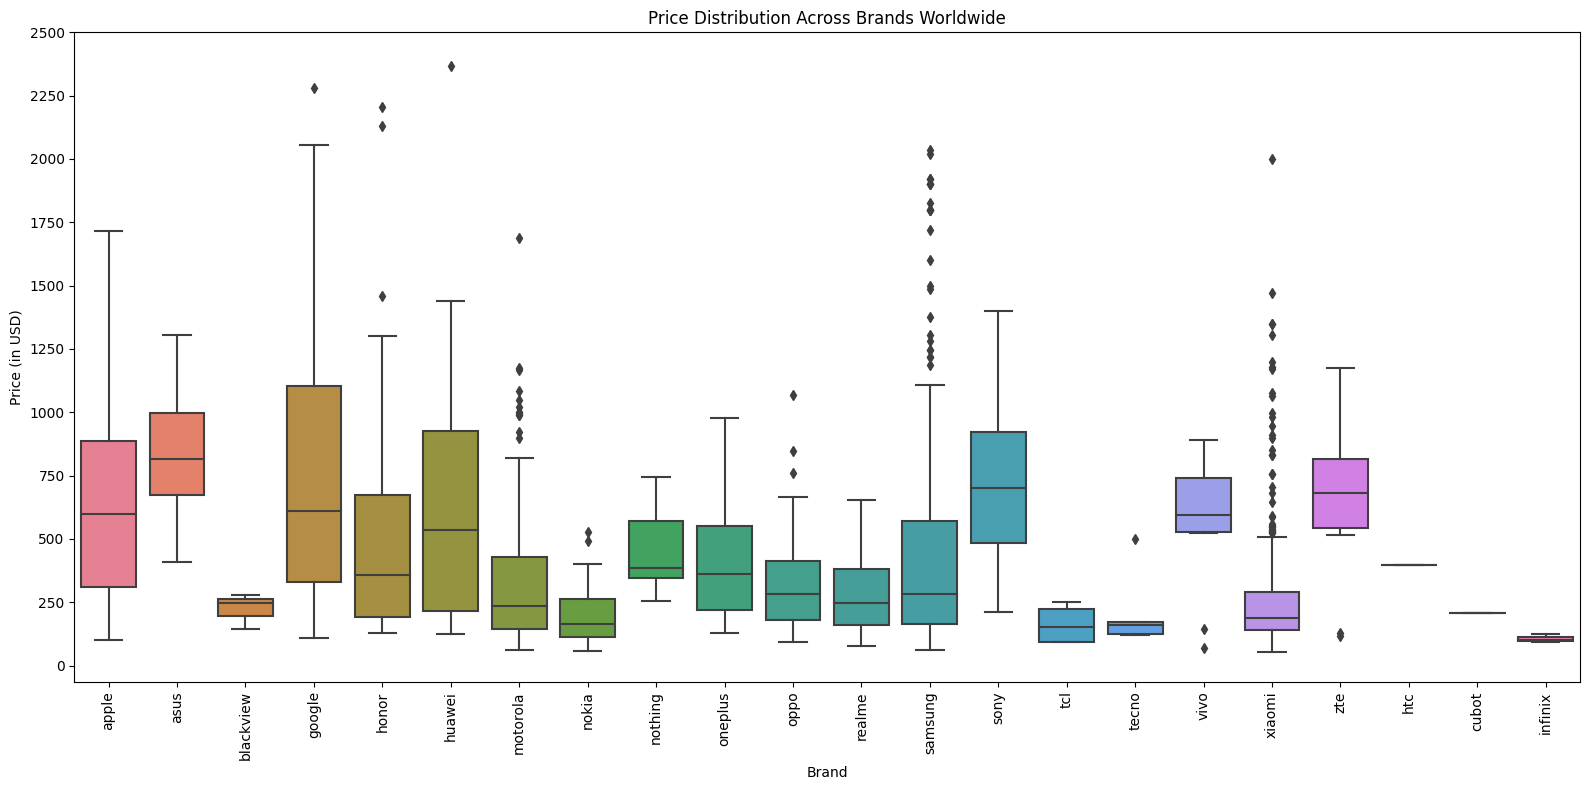

In [30]:
unique_brands = df_all['phone_brand'].unique()
palette = sns.color_palette("husl", len(unique_brands))
max_price = df_all['price_USD'].max()
#Visualize Price distribution across Brands
plt.figure(figsize=(16, 8))
sns.boxplot(x='phone_brand', y='price_USD', data=df_all,palette=palette)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max_price + 250, 250))
plt.title('Price Distribution Across Brands Worldwide')
plt.xlabel('Brand')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

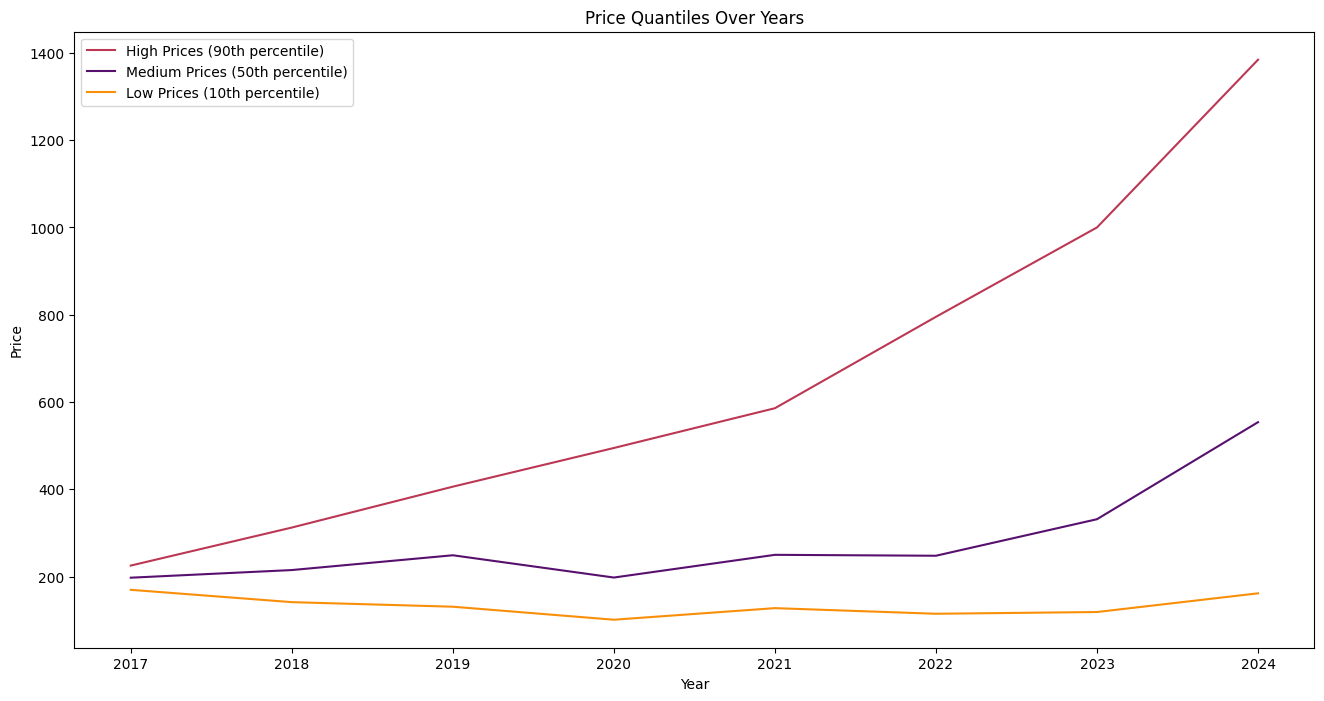

In [31]:
plt.figure(figsize=(16, 8))
pallet_Quantiles = sns.color_palette("inferno", 3)
plt.plot(price_quantiles['Year'], price_quantiles['quantile_90'], label='High Prices (90th percentile)', color=pallet_Quantiles[1])
plt.plot(price_quantiles['Year'], price_quantiles['quantile_50'], label='Medium Prices (50th percentile)', color=pallet_Quantiles[0])
plt.plot(price_quantiles['Year'], price_quantiles['quantile_10'], label='Low Prices (10th percentile)', color=pallet_Quantiles[2])
plt.title('Price Quantiles Over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

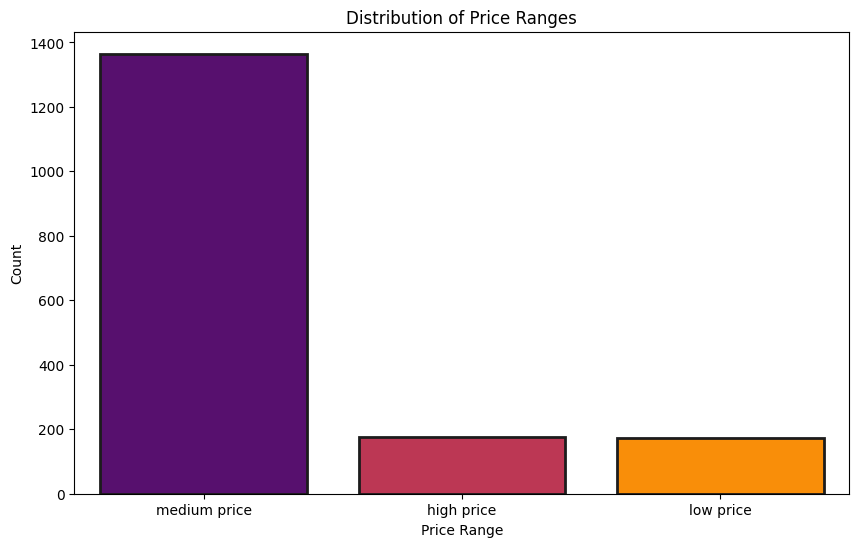

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_all, x='price_range',palette='inferno',saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


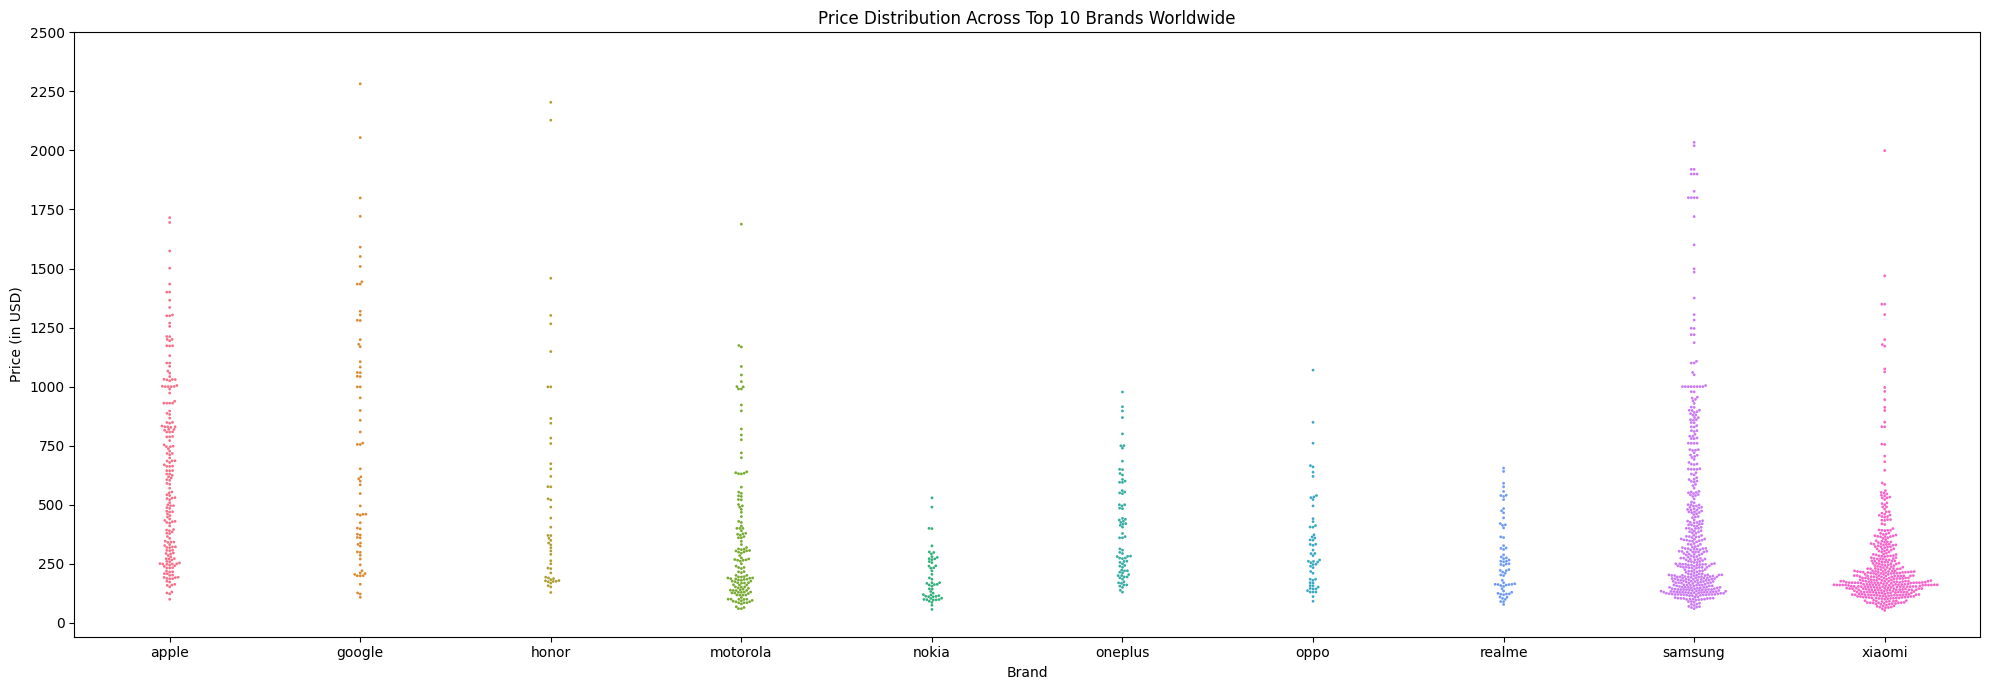

In [33]:
# Get the top 10 most popular brands
top_10_brands = df_all['phone_brand'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 brands
df_top_10_brands = df_all[df_all['phone_brand'].isin(top_10_brands)]

# Generate the plot
unique_brands = df_top_10_brands['phone_brand'].unique()
palette = sns.color_palette("husl", len(unique_brands))
max_price = df_top_10_brands['price_USD'].max()


plt.figure(figsize=(20, 7))
sns.swarmplot(x='phone_brand', y='price_USD', data=df_top_10_brands, hue='phone_brand', palette=palette, legend=False, size=2)
plt.yticks(np.arange(0, max_price + 250, 250))
plt.title('Price Distribution Across Top 10 Brands Worldwide')
plt.xlabel('Brand')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

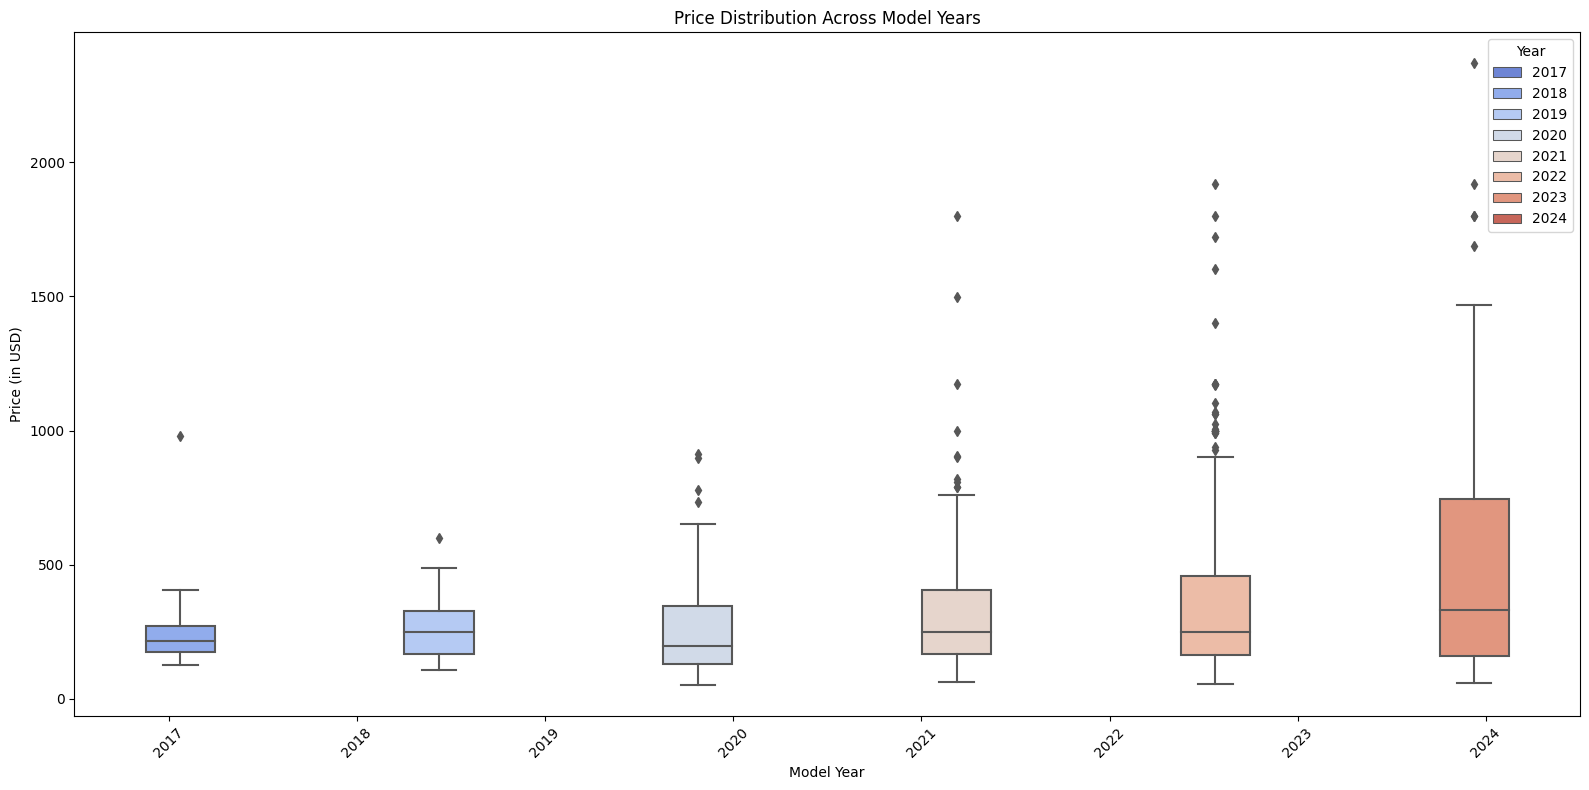

In [34]:
unique_years = df_all['Year'].dropna().unique()
palette = sns.color_palette("coolwarm",len(unique_years))
#Visualize Price distribution across Model Year
plt.figure(figsize=(16,8))
sns.boxplot(x='Year', y='price_USD', data=df_all,hue='Year',palette=palette, width= 3)
plt.xticks(rotation=45)
plt.title('Price Distribution Across Model Years')
plt.xlabel('Model Year')
plt.ylabel('Price (in USD)')
plt.tight_layout()
plt.show()

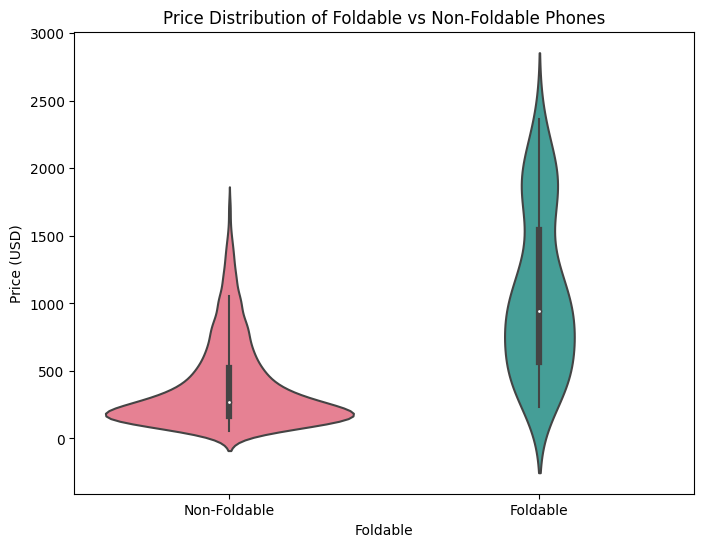

In [35]:
palette = sns.color_palette('husl', 2)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Foldable', y='price_USD', data=df_all,palette=palette)
plt.title('Price Distribution of Foldable vs Non-Foldable Phones')
plt.xlabel('Foldable')
plt.ylabel('Price (USD)')
plt.xticks([0, 1], ['Non-Foldable', 'Foldable'])
plt.show()

# Correlation

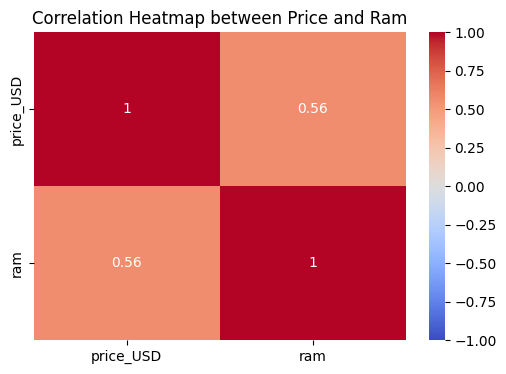

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'ram']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Ram')
plt.show()

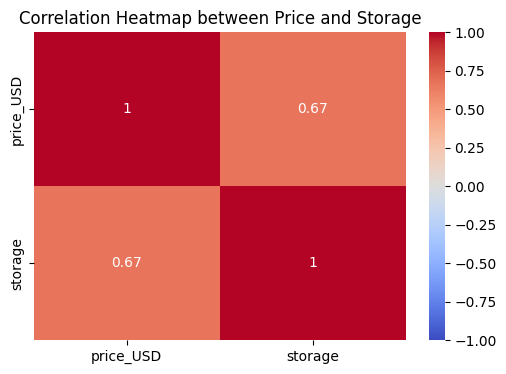

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'storage']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Storage')
plt.show()

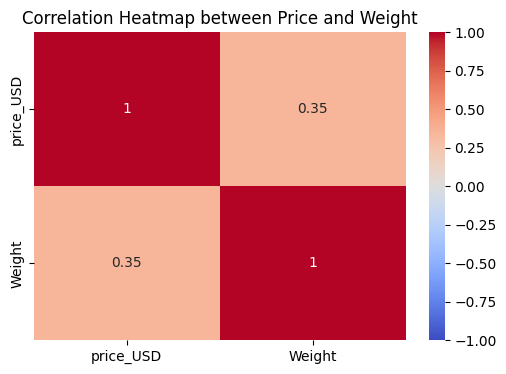

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'Weight']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Weight')
plt.show()

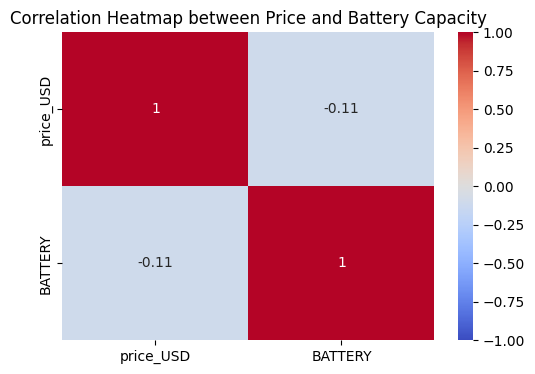

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'BATTERY']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Battery Capacity')
plt.show()

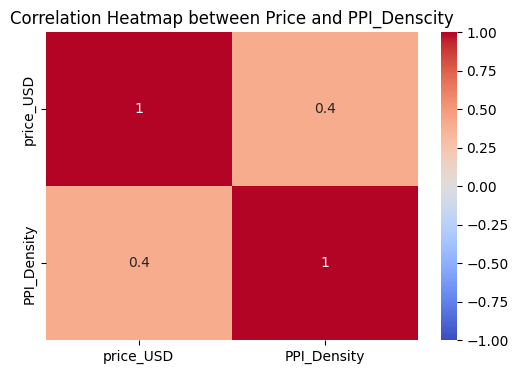

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'PPI_Density']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and PPI_Denscity')
plt.show()

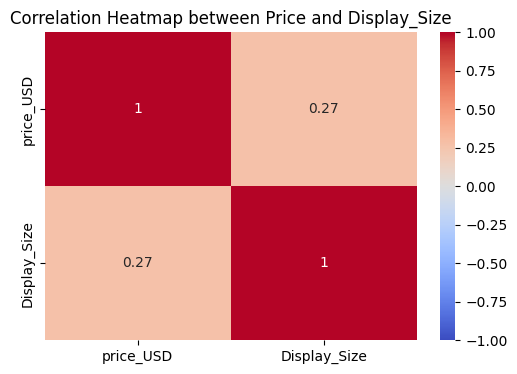

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_all[['price_USD', 'Display_Size']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Price and Display_Size')
plt.show()

In [44]:
corr, p_value = pointbiserialr(df_all['Foldable'], df_all['price_USD'])

print(f'Point-Biserial Correlation: {corr}')
print(f'P-value: {p_value}')

Point-Biserial Correlation: 0.40577838400198496
P-value: 5.663296737322679e-69


In [45]:
corr, p_value = pointbiserialr(df_all['NFC'], df_all['price_USD'])

print(f'Point-Biserial Correlation: {corr}')
print(f'P-value: {p_value}')

Point-Biserial Correlation: 0.22975866504237014
P-value: 5.570633985401885e-22


# Most common configs

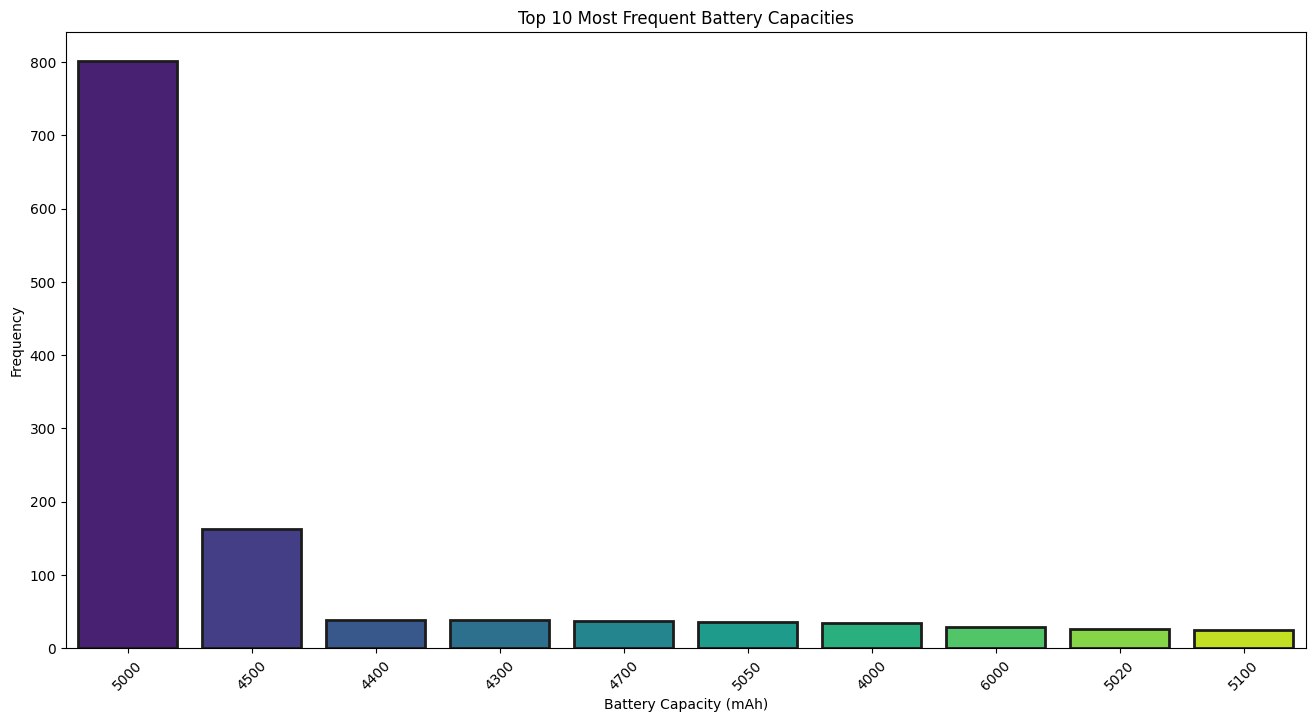

In [46]:
top_10_battery = df_all['BATTERY'].value_counts().head(10).reset_index()
top_10_battery.columns = ['BATTERY', 'Frequency']
plt.figure(figsize=(16, 8))
sns.barplot(x='BATTERY', y='Frequency', data=top_10_battery, palette='viridis', order=top_10_battery['BATTERY'],saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
plt.title('Top 10 Most Frequent Battery Capacities')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [47]:
def ram_storage_group(df):
    grouped = df.groupby(['ram', 'storage']).agg(
        count=('price_USD', 'size'),  
        avg_price=('price_USD', 'mean')  
    ).reset_index()
    grouped['avg_price'] = grouped['avg_price'].round(2)  
    return grouped.sort_values(by='count', ascending=False)  
most_common_configs = ram_storage_group(df_all)

table = PrettyTable()
# Add column names
table.field_names = most_common_configs.columns.tolist()
# Add rows to the table
for index, row in most_common_configs.head(10).iterrows():
    table.add_row(row)

print(table)

+------+---------+-------+-----------+
| ram  | storage | count | avg_price |
+------+---------+-------+-----------+
| 8.0  |  256.0  | 326.0 |   395.68  |
| 6.0  |  128.0  | 185.0 |   204.28  |
| 8.0  |  128.0  | 175.0 |   251.94  |
| 4.0  |  128.0  | 175.0 |   162.65  |
| 12.0 |  256.0  | 169.0 |   442.91  |
| 12.0 |  512.0  | 152.0 |   786.05  |
| 6.0  |  256.0  |  61.0 |   485.04  |
| 8.0  |  512.0  |  59.0 |   801.19  |
| 4.0  |   64.0  |  55.0 |   141.6   |
| 16.0 |  512.0  |  45.0 |  1011.83  |
+------+---------+-------+-----------+


Text(95.72222222222221, 0.5, 'RAM (GB)')

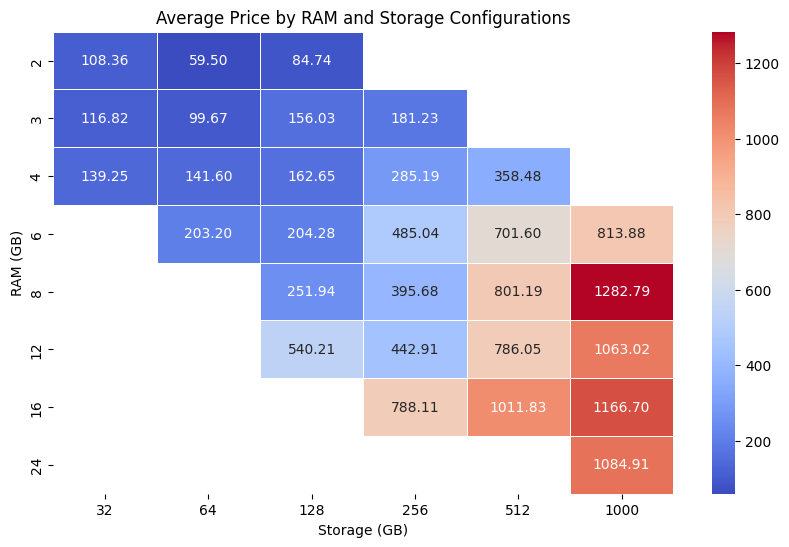

In [48]:
pivot_table = most_common_configs.pivot_table(index='ram', columns='storage', values='avg_price')
# Create a heatmap based on the average prices
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')

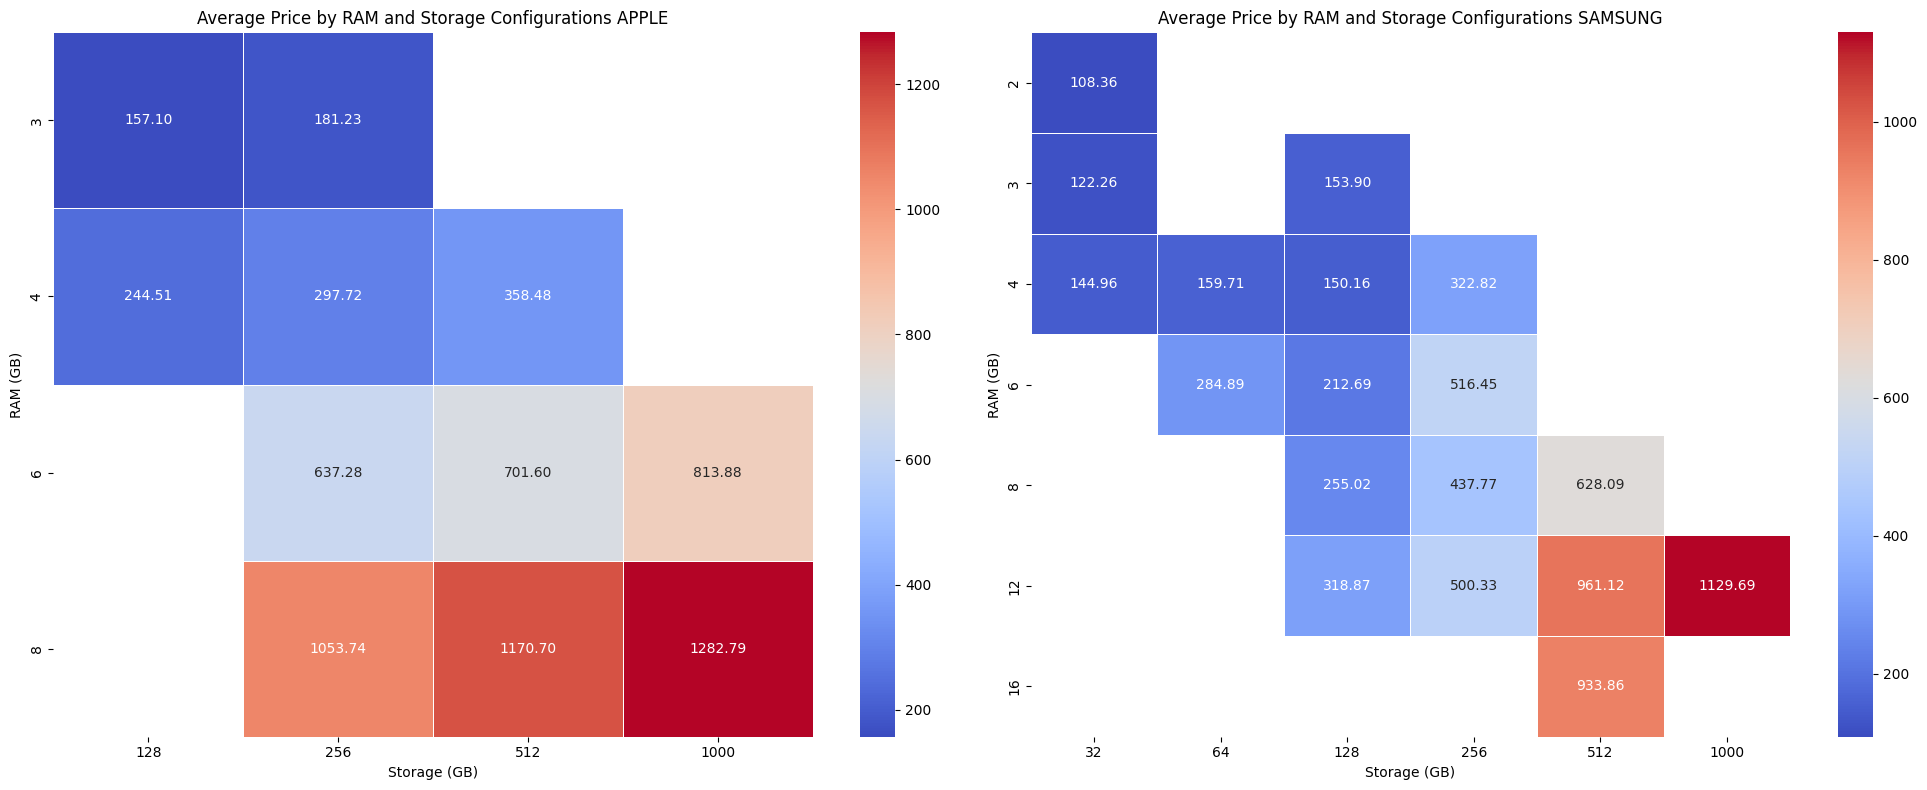

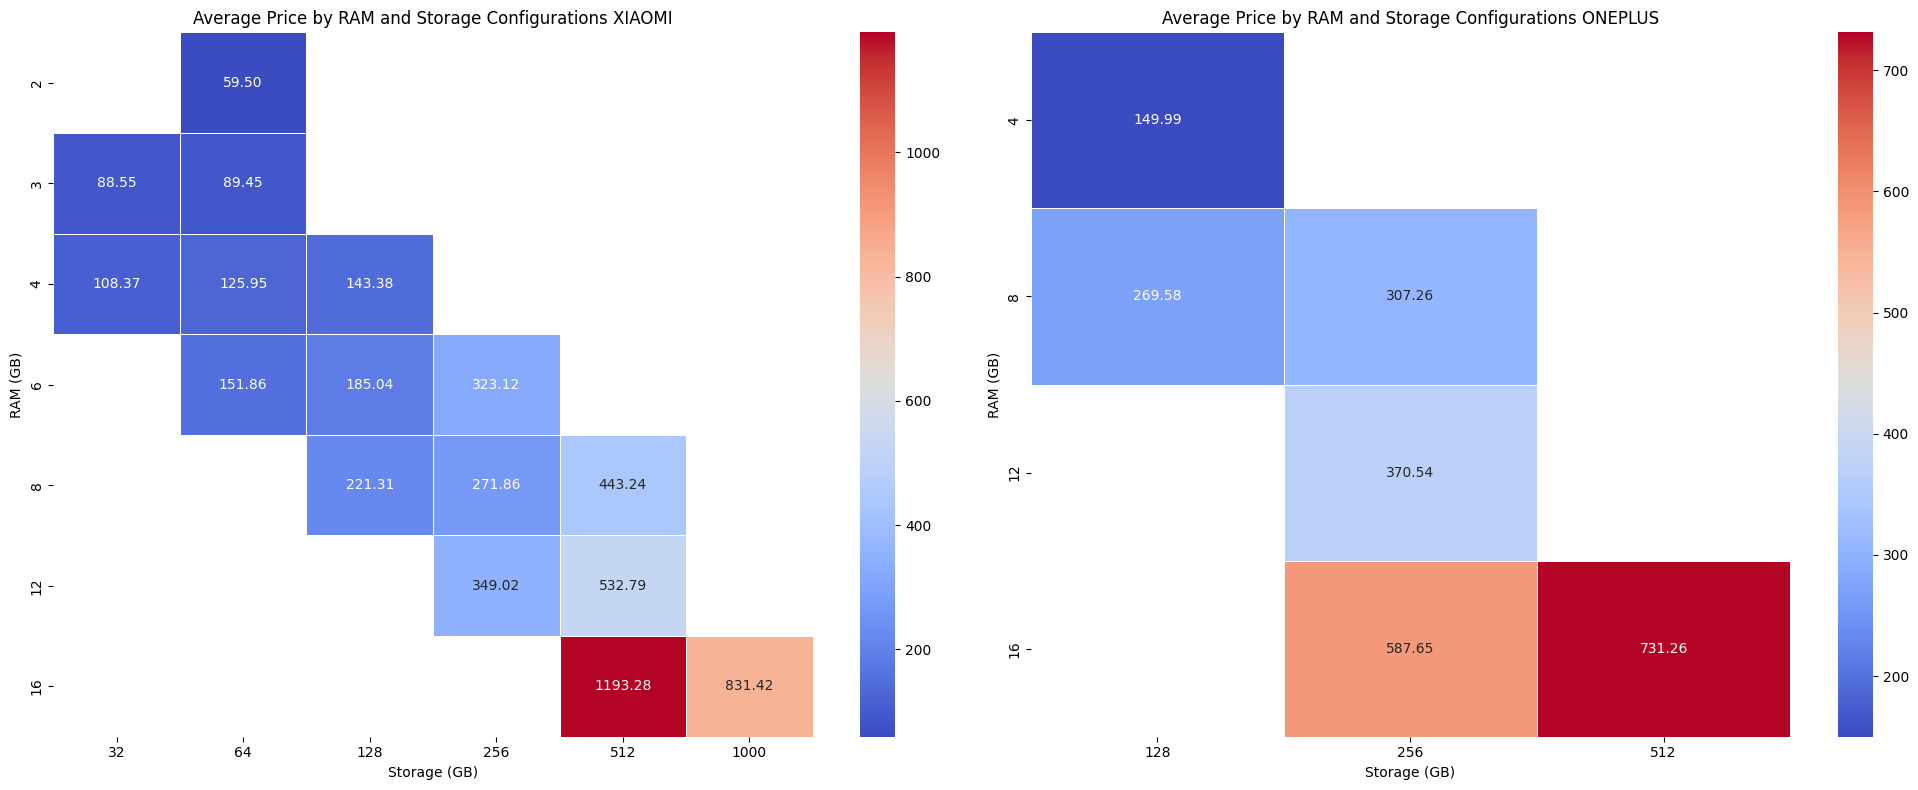

In [49]:
df_apple = df_all[df_all['phone_brand'] == 'apple']
df_samsung = df_all[df_all['phone_brand'] == 'samsung']
df_oneplus = df_all[df_all['phone_brand'] == 'oneplus']
df_xiaomi = df_all[df_all['phone_brand'] == 'xiaomi']
most_common_configs_apple=ram_storage_group(df_apple)
pivot_table = most_common_configs_apple.pivot_table(index='ram', columns='storage', values='avg_price')
most_common_configs_samsung = ram_storage_group(df_samsung)
pivot_table_samsung = most_common_configs_samsung.pivot_table(index='ram', columns='storage', values='avg_price')

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations APPLE')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_samsung, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations SAMSUNG')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.tight_layout()
plt.show()

most_common_configs_xiaomi = ram_storage_group(df_xiaomi)
pivot_table_xiaomi = most_common_configs_xiaomi.pivot_table(index='ram', columns='storage', values='avg_price')
most_common_configs_oneplus = ram_storage_group(df_oneplus)
pivot_table_oneplus = most_common_configs_oneplus.pivot_table(index='ram', columns='storage', values='avg_price')

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.heatmap(pivot_table_xiaomi, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations XIAOMI')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_oneplus, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Average Price by RAM and Storage Configurations ONEPLUS')
plt.xlabel('Storage (GB)')
plt.ylabel('RAM (GB)')
plt.tight_layout()
plt.show()

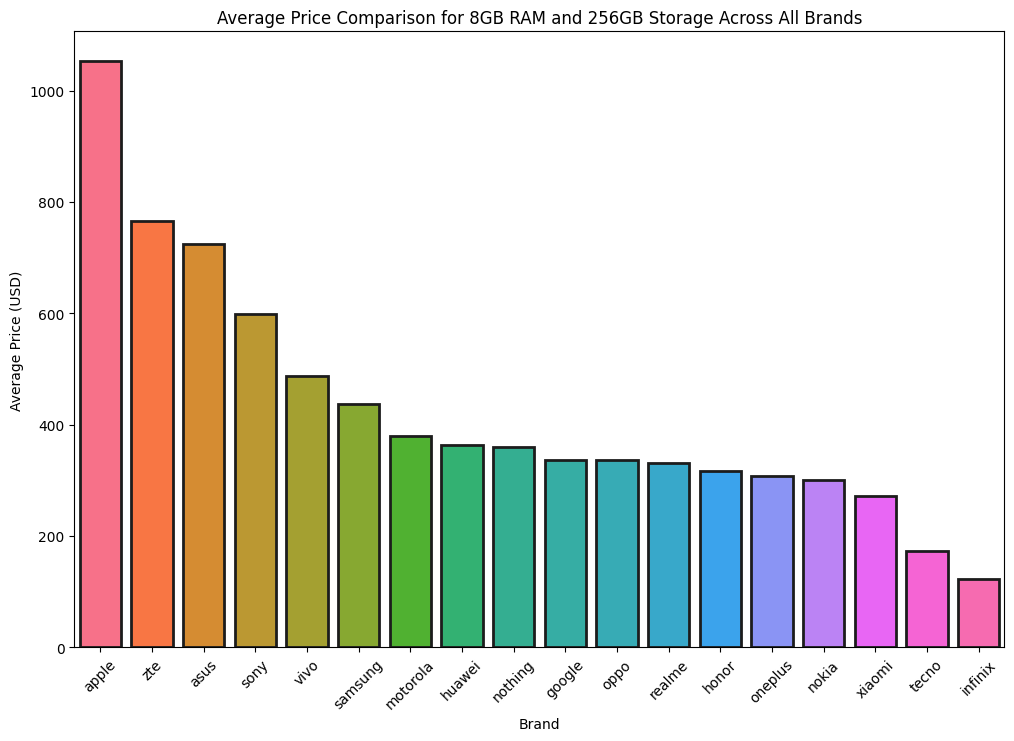

In [50]:
# Assuming df_all is already defined and contains the necessary data
# Filter the DataFrame for 8GB RAM and 256GB Storage
filtered_df = df_all[(df_all['ram'] == 8) & (df_all['storage'] == 256)]

# Group by brand and calculate the average price
avg_prices = filtered_df.groupby('phone_brand')['price_USD'].mean().reset_index()

# Sort the brands by average price for better visualization
avg_prices = avg_prices.sort_values(by='price_USD', ascending=False)

unique_brands = df_all['phone_brand'].unique()
palette = sns.color_palette("husl", len(unique_brands)-4) # Remove the last 4 colors to match the number of brands plotted
plt.figure(figsize=(12, 8))
sns.barplot(x='phone_brand', y='price_USD', data=avg_prices, palette=palette,saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
plt.title('Average Price Comparison for 8GB RAM and 256GB Storage Across All Brands')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Displays

<Axes: xlabel='Display_Size', ylabel='price_USD'>

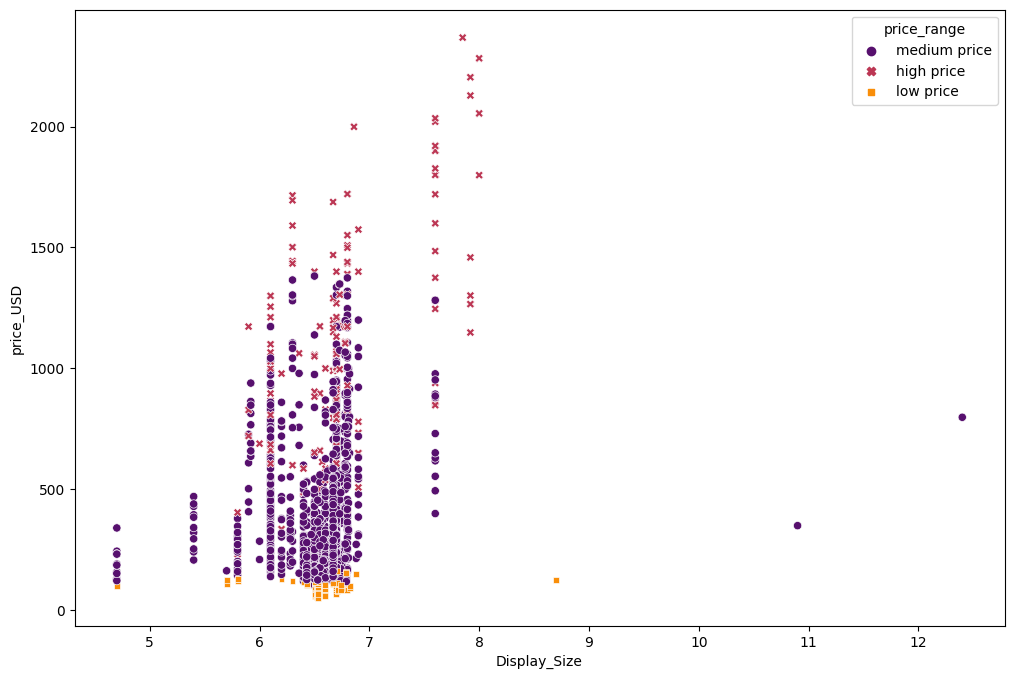

In [51]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Display_Size', y='price_USD', data=df_all, hue='price_range', style='price_range', palette='inferno')

<Axes: xlabel='PPI_Density', ylabel='price_USD'>

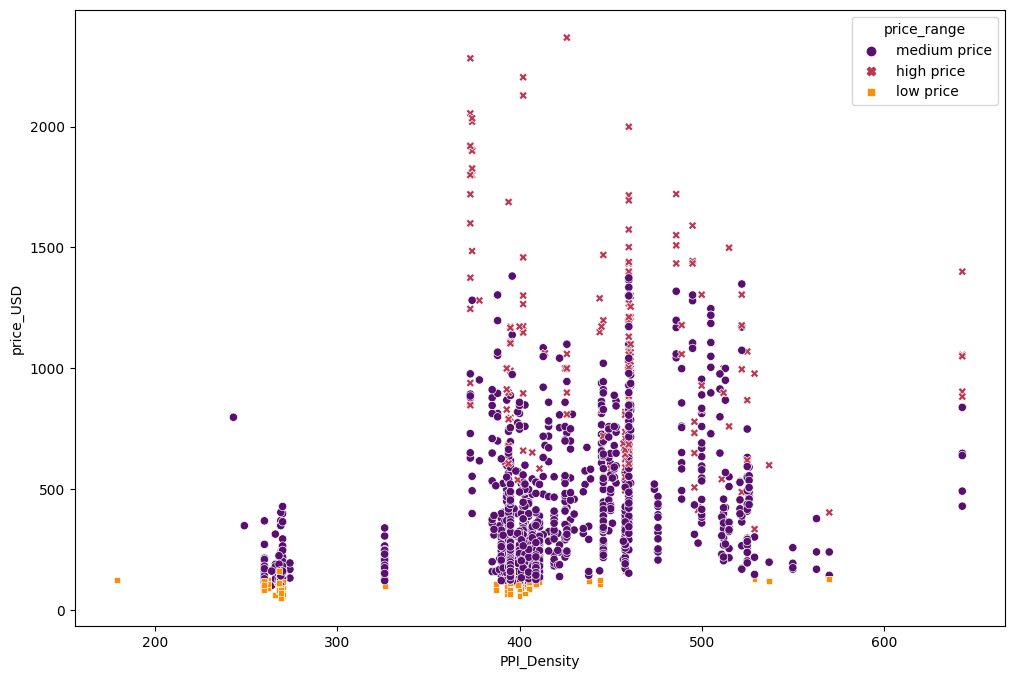

In [52]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PPI_Density', y='price_USD', data=df_all, hue='price_range', style='price_range', palette='inferno')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


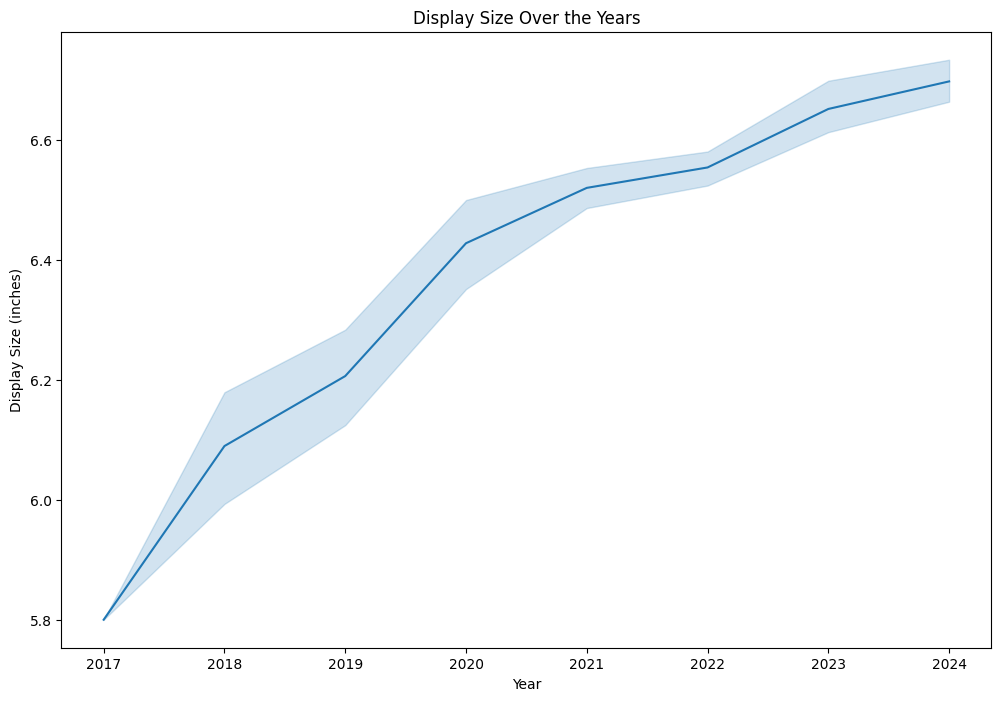

In [53]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Display_Size', data=df_all)
plt.title('Display Size Over the Years')
plt.xlabel('Year')
plt.ylabel('Display Size (inches)')
plt.show()